## Figure 16 (Journal of Climate submission; Molina et al.)

Fig.16. Pacific meridional streamfunction (Sv; 106m3s−1) to a depth of approximately 900 meters during (b) all years, (c) El Niño (ONI≥+0.5), and (i) La Niña (ONI≤-0.5) shown for the CESM1 control. Pacific meridional streamfunction during El Niño and La Niña are also shown for the sensitivity experiments (d-h, i-n). Time periods considered are the same as in Fig. 2. Pacific meridional streamfunction for the CESM1 controlduring all months and years (a) also shown for comparison.

**Figure by: Maria J. Molina, NCAR**

In [1]:
# imports 
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from climatico import enso
import cftime
from datetime import timedelta

In [2]:
from config import directory_figs, directory_data

In [3]:
# list of filenames to do this for
TVTS_g02sv = 'TVTS_b.e11.B1850LENS.f09_g16.FWAtSalG02Sv.pop.h.*.mon.nc'
TVTS_g04sv = 'TVTS_b.e11.B1850LENS.f09_g16.FWAtSalG04Sv.pop.h.*.mon.nc'
TVTS_p02sv = 'TVTS_b.e11.B1850LENS.f09_g16.FWAtSalP02Sv.pop.h.*.mon.nc'
TVTS_p04sv = 'TVTS_b.e11.B1850LENS.f09_g16.FWAtSalP04Sv.pop.h.*.mon.nc'
TVTS_psalt = 'TVTS_b.e11.B1850LENS.f09_g16.FWPaSalP04Sv.pop.h.*.mon.nc'
TVTS_cntrl = 'TVTS_b.e11.B1850C5CN.f09_g16.005.pop.h.*.mon.nc'

In [4]:
def get_var(ds):
    return ds['pmsf'].to_dataset(name='pmsf')

In [5]:
ds_g02sv = xr.open_mfdataset(f'{directory_data}{TVTS_g02sv}', preprocess=get_var, combine='by_coords')
ds_g04sv = xr.open_mfdataset(f'{directory_data}{TVTS_g04sv}', preprocess=get_var, combine='by_coords')
ds_p02sv = xr.open_mfdataset(f'{directory_data}{TVTS_p02sv}', preprocess=get_var, combine='by_coords')
ds_p04sv = xr.open_mfdataset(f'{directory_data}{TVTS_p04sv}', preprocess=get_var, combine='by_coords')
ds_psalt = xr.open_mfdataset(f'{directory_data}{TVTS_psalt}', preprocess=get_var, combine='by_coords')
ds_cntrl = xr.open_mfdataset(f'{directory_data}{TVTS_cntrl}', preprocess=get_var, combine='by_coords')

In [6]:
# coords
levs = ds_cntrl.sel(lat=slice(-30,30), lev=slice(0,1000)).coords['lev']
lats = ds_cntrl.sel(lat=slice(-30,30), lev=slice(0,1000)).coords['lat']

In [7]:
ds_g02sv = ds_g02sv.assign_coords(time=ds_g02sv.coords['time'] - timedelta(days=17)).sel(lat=slice(-30,30), lev=slice(0,1000))
ds_g04sv = ds_g04sv.assign_coords(time=ds_g04sv.coords['time'] - timedelta(days=17)).sel(lat=slice(-30,30), lev=slice(0,1000))
ds_p02sv = ds_p02sv.assign_coords(time=ds_p02sv.coords['time'] - timedelta(days=17)).sel(lat=slice(-30,30), lev=slice(0,1000))
ds_p04sv = ds_p04sv.assign_coords(time=ds_p04sv.coords['time'] - timedelta(days=17)).sel(lat=slice(-30,30), lev=slice(0,1000))
ds_psalt = ds_psalt.assign_coords(time=ds_psalt.coords['time'] - timedelta(days=17)).sel(lat=slice(-30,30), lev=slice(0,1000))
ds_cntrl = ds_cntrl.assign_coords(time=ds_cntrl.coords['time'] - timedelta(days=17)).sel(lat=slice(-30,30), lev=slice(0,1000))

In [8]:
ds_g02sv = ds_g02sv['pmsf'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1),cftime.DatetimeNoLeap(501, 1, 1))).mean('time',skipna=True)
ds_g04sv = ds_g04sv['pmsf'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1),cftime.DatetimeNoLeap(501, 1, 1))).mean('time',skipna=True)
ds_p02sv = ds_p02sv['pmsf'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1),cftime.DatetimeNoLeap(501, 1, 1))).mean('time',skipna=True)
ds_p04sv = ds_p04sv['pmsf'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1),cftime.DatetimeNoLeap(501, 1, 1))).mean('time',skipna=True)
ds_psalt = ds_psalt['pmsf'].sel(time=slice(cftime.DatetimeNoLeap(101, 1, 1),cftime.DatetimeNoLeap(251, 1, 1))).mean('time',skipna=True)
ds_cntrl = ds_cntrl['pmsf'].sel(time=slice(cftime.DatetimeNoLeap(800, 1, 1),cftime.DatetimeNoLeap(1600, 1, 1))).mean('time',skipna=True)

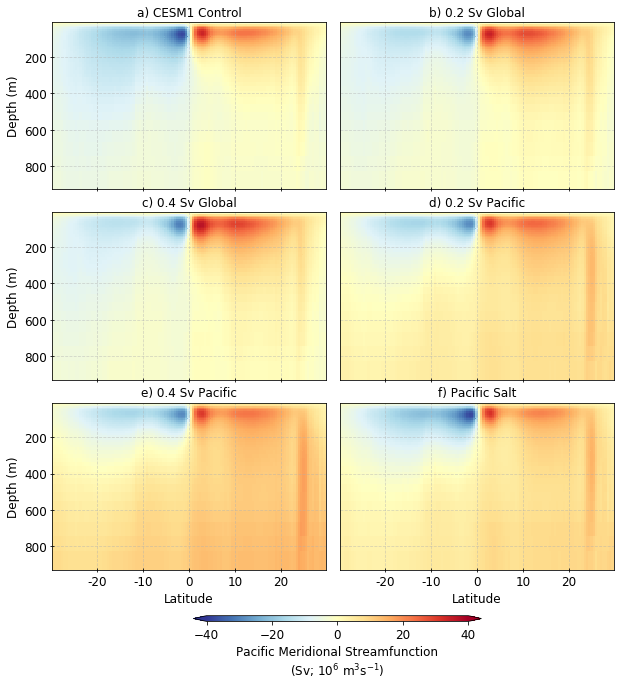

In [9]:
# --------------

fig = plt.figure(figsize=(8,8))

# --------------

ax0 = plt.axes([0., 0.66, 0.475, 0.29])

ax0.set_title('a) CESM1 Control', fontsize=12)

cs = ax0.pcolormesh(lats, levs, ds_cntrl.values, cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')

ax0.set_yticks([0,200,400,600,800,1000])
ax0.set_yticklabels([0,200,400,600,800,1000], fontsize=12)
ax0.set_xticks([-20,-10,0,10,20])
ax0.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax0.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax0.grid(alpha=0.5, ls='--')
ax0.set_ylabel('Depth (m)', fontsize=12)

# --------------

ax1 = plt.axes([0.5, 0.66, 0.475, 0.29])

ax1.set_title('b) 0.2 Sv Global', fontsize=12)

ax1.pcolormesh(lats, levs, ds_g02sv.values, cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')

ax1.set_yticks([0,200,400,600,800,1000])
ax1.set_yticklabels([0,200,400,600,800,1000], fontsize=12)
ax1.set_xticks([-20,-10,0,10,20])
ax1.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax1.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax1.grid(alpha=0.5, ls='--')

# --------------

ax2 = plt.axes([0., 0.33, 0.475, 0.29])

ax2.set_title('c) 0.4 Sv Global', fontsize=12)

cs1 = ax2.pcolormesh(lats, levs, ds_g04sv.values, cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')

ax2.set_yticks([0,200,400,600,800,1000])
ax2.set_yticklabels([0,200,400,600,800,1000], fontsize=12)
ax2.set_xticks([-20,-10,0,10,20])
ax2.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax2.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax2.grid(alpha=0.5, ls='--')
ax2.set_ylabel('Depth (m)', fontsize=12)

# --------------

ax3 = plt.axes([0.5, 0.33, 0.475, 0.29])

ax3.set_title('d) 0.2 Sv Pacific', fontsize=12)

ax3.pcolormesh(lats, levs, ds_p02sv.values, cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')

ax3.set_yticks([0,200,400,600,800,1000])
ax3.set_yticklabels([0,200,400,600,800,1000], fontsize=12)
ax3.set_xticks([-20,-10,0,10,20])
ax3.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax3.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax3.grid(alpha=0.5, ls='--')

# --------------

ax00 = plt.axes([0., 0., 0.475, 0.29])

ax00.set_title('e) 0.4 Sv Pacific', fontsize=12)

ax00.pcolormesh(lats, levs, ds_p04sv.values, cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')

ax00.set_yticks([0,200,400,600,800,1000])
ax00.set_yticklabels([0,200,400,600,800,1000], fontsize=12)
ax00.set_xticks([-20,-10,0,10,20])
ax00.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax00.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=True, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax00.grid(alpha=0.5, ls='--')
ax00.set_ylabel('Depth (m)', fontsize=12)
ax00.set_xlabel(u'Latitude', fontsize=12)

# --------------

ax4 = plt.axes([0.5, 0., 0.475, 0.29])

ax4.set_title('f) Pacific Salt', fontsize=12)

ax4.pcolormesh(lats, levs, ds_psalt.values, cmap='RdYlBu_r', vmin=-40., vmax=40., shading='auto')

ax4.set_yticks([0,200,400,600,800,1000])
ax4.set_yticklabels([0,200,400,600,800,1000], fontsize=12)
ax4.set_xticks([-20,-10,0,10,20])
ax4.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax4.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=True, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax4.grid(alpha=0.5, ls='--')
ax4.set_xlabel(u'Latitude', fontsize=12)

# --------------

a = u"\u00b0"

cbar_ax = fig.add_axes([0.245, -0.09, 0.5, 0.01])
ticks_1 = [-40,-20,0,20,40]
cbar = fig.colorbar(cs1, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.set_label('Pacific Meridional Streamfunction\n(Sv; 10$^6$ m$^3$s$^{-1}$)', fontsize=12)
cbar.ax.tick_params(labelsize=12) 

# --------------

plt.savefig(f'{directory_figs}amocenso_fig16.png', bbox_inches='tight', dpi=200)
plt.savefig(f'{directory_figs}amocenso_fig16.pdf', bbox_inches='tight', dpi=500)
plt.show()

# --------------

### Alternative version for reference

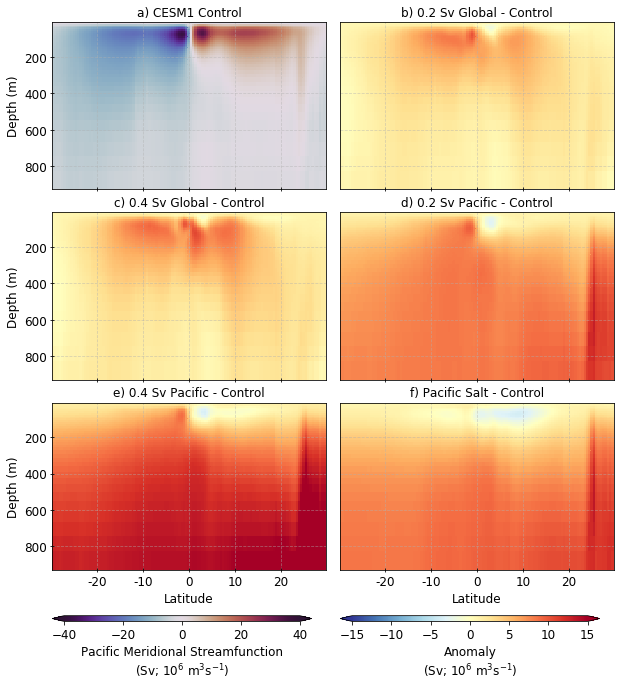

In [40]:
# --------------

fig = plt.figure(figsize=(8,8))

# --------------

ax0 = plt.axes([0., 0.66, 0.475, 0.29])

ax0.set_title('a) CESM1 Control', fontsize=12)

cs = ax0.pcolormesh(lats, levs, ds_cntrl.values, cmap='twilight_shifted', vmin=-40., vmax=40., shading='auto')

ax0.set_yticks([0,200,400,600,800,1000])
ax0.set_yticklabels([0,200,400,600,800,1000], fontsize=12)
ax0.set_xticks([-20,-10,0,10,20])
ax0.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax0.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax0.grid(alpha=0.5, ls='--')
ax0.set_ylabel('Depth (m)', fontsize=12)

# --------------

ax1 = plt.axes([0.5, 0.66, 0.475, 0.29])

ax1.set_title('b) 0.2 Sv Global - Control', fontsize=12)

ax1.pcolormesh(lats, levs, ds_g02sv.values - ds_cntrl.values, cmap='RdYlBu_r', vmin=-15., vmax=15., shading='auto')

ax1.set_yticks([0,200,400,600,800,1000])
ax1.set_yticklabels([0,200,400,600,800,1000], fontsize=12)
ax1.set_xticks([-20,-10,0,10,20])
ax1.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax1.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax1.grid(alpha=0.5, ls='--')

# --------------

ax2 = plt.axes([0., 0.33, 0.475, 0.29])

ax2.set_title('c) 0.4 Sv Global - Control', fontsize=12)

cs1 = ax2.pcolormesh(lats, levs, ds_g04sv.values - ds_cntrl.values, cmap='RdYlBu_r', vmin=-15., vmax=15., shading='auto')

ax2.set_yticks([0,200,400,600,800,1000])
ax2.set_yticklabels([0,200,400,600,800,1000], fontsize=12)
ax2.set_xticks([-20,-10,0,10,20])
ax2.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax2.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax2.grid(alpha=0.5, ls='--')
ax2.set_ylabel('Depth (m)', fontsize=12)

# --------------

ax3 = plt.axes([0.5, 0.33, 0.475, 0.29])

ax3.set_title('d) 0.2 Sv Pacific - Control', fontsize=12)

ax3.pcolormesh(lats, levs, ds_p02sv.values - ds_cntrl.values, cmap='RdYlBu_r', vmin=-15., vmax=15, shading='auto')

ax3.set_yticks([0,200,400,600,800,1000])
ax3.set_yticklabels([0,200,400,600,800,1000], fontsize=12)
ax3.set_xticks([-20,-10,0,10,20])
ax3.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax3.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=False, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax3.grid(alpha=0.5, ls='--')

# --------------

ax00 = plt.axes([0., 0., 0.475, 0.29])

ax00.set_title('e) 0.4 Sv Pacific - Control', fontsize=12)

ax00.pcolormesh(lats, levs, ds_p04sv.values - ds_cntrl.values, cmap='RdYlBu_r', vmin=-15., vmax=15, shading='auto')

ax00.set_yticks([0,200,400,600,800,1000])
ax00.set_yticklabels([0,200,400,600,800,1000], fontsize=12)
ax00.set_xticks([-20,-10,0,10,20])
ax00.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax00.tick_params(axis='both', labelleft=True, left=True, right=False, labelright=False, 
                direction='inout', labelbottom=True, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax00.grid(alpha=0.5, ls='--')
ax00.set_ylabel('Depth (m)', fontsize=12)
ax00.set_xlabel(u'Latitude', fontsize=12)

# --------------

ax4 = plt.axes([0.5, 0., 0.475, 0.29])

ax4.set_title('f) Pacific Salt - Control', fontsize=12)

ax4.pcolormesh(lats, levs, ds_psalt.values - ds_cntrl.values, cmap='RdYlBu_r', vmin=-15., vmax=15., shading='auto')

ax4.set_yticks([0,200,400,600,800,1000])
ax4.set_yticklabels([0,200,400,600,800,1000], fontsize=12)
ax4.set_xticks([-20,-10,0,10,20])
ax4.set_xticklabels([-20,-10,0,10,20], fontsize=12)

ax4.tick_params(axis='both', labelleft=False, left=False, right=False, labelright=False, 
                direction='inout', labelbottom=True, bottom=True)

plt.ylim(levs.max(), levs.min())
plt.xlim(lats.min(), lats.max())

ax4.grid(alpha=0.5, ls='--')
ax4.set_xlabel(u'Latitude', fontsize=12)

# --------------

a = u"\u00b0"

cbar_ax = fig.add_axes([0., -0.09, 0.45, 0.01])
ticks_1 = [-40,-20,0,20,40]
cbar = fig.colorbar(cs, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.set_label('Pacific Meridional Streamfunction\n(Sv; 10$^6$ m$^3$s$^{-1}$)', fontsize=12)
cbar.ax.tick_params(labelsize=12) 

cbar_ax = fig.add_axes([0.5, -0.09, 0.45, 0.01])
ticks_1 = [-15,-10,-5,0,5,10,15]
cbar = fig.colorbar(cs1, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')
cbar.set_label('Anomaly\n(Sv; 10$^6$ m$^3$s$^{-1}$)', fontsize=12)
cbar.ax.tick_params(labelsize=12) 

# --------------

#plt.savefig(f'{directory_figs}amocenso_fig16v2.png', bbox_inches='tight', dpi=200)
#plt.savefig(f'{directory_figs}amocenso_fig16v2.pdf', bbox_inches='tight', dpi=500)
plt.show()

# --------------